# Algorithmes Stochastiques Introduction et Mixtures Gaussiennes


## Exercice 1
Le but de cet exercice est d'illustrer que toutes les distributions peuvent être approchées par un mélange gaussien (par exemple au sens de la norme $L^1$). Tracer les mélanges gaussiens suivants : 12 mélanges gaussiens à illustrer
<img src="/Users/bouacha_lazhar/OneDrive/Master MMA/M2 MMA/M2 S3/Algorithmes stochastiques/ClassicalGaussianMixtures.png">

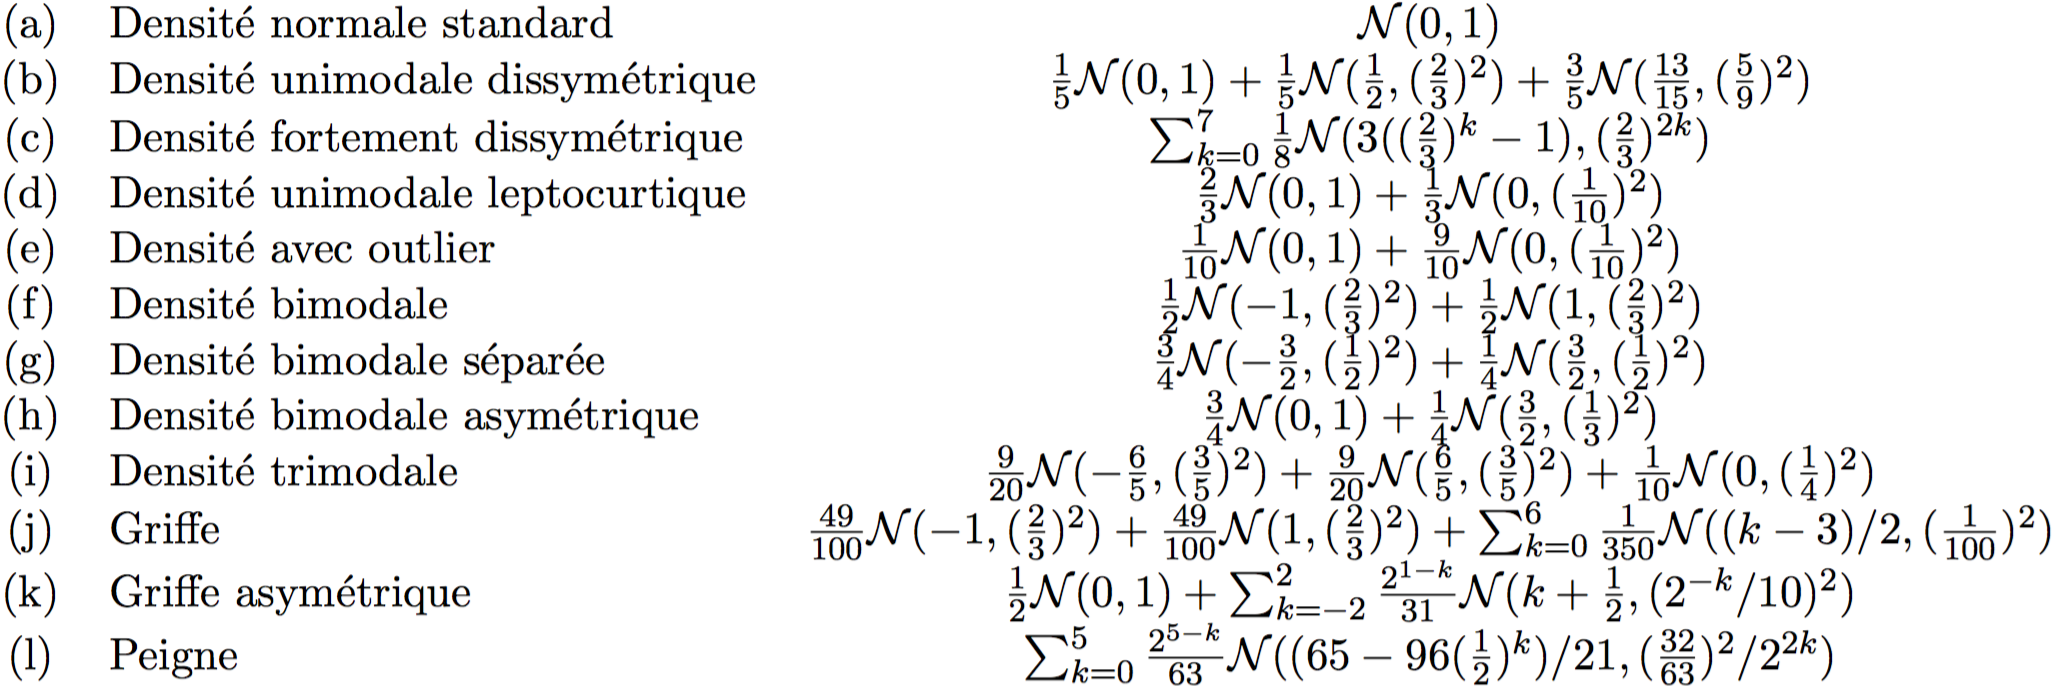

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

In [12]:
from TP_gaussian_mixture import *

### Densité normale standard 

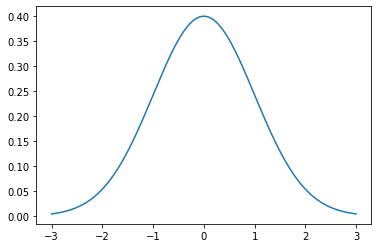

In [339]:
def stand(x, m, sigma):
    return sps.norm.pdf(x, loc = m, scale = sigma)

m = 0
sigma = 1
x = np.linspace(-3, 3, 10**3)
stand(x, m, sigma)

plt.plot(x, stand(x, m, sigma))

### Densité unimodale dissymétrique 
A vous de jouer !!!

In [340]:
def dissym(x):
    return (1/5)*(stand(x, 0, 1) + stand(x, 1/2, (2/3)) + 3*stand(x, 13/15, (5/9)))

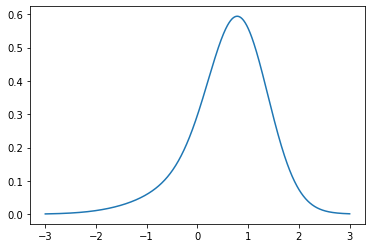

In [341]:
x = np.linspace(-3, 3, 10**3)
plt.plot(x, dissym(x))

### Peigne

In [342]:
def peigne(x, K):
    y = np.zeros(x.shape)
    P = np.zeros(K)
    m = np.zeros(K)
    sigma = np.zeros(K)
    for k in range(K):
        P[k] = (2**(5-k))/63
        m[k] = (65-96*(2**-k))/21
        sigma[k] = (2**(-k))*(32/63)
        y = y + P[k]*stand(x, m[k], sigma[k])
    return y

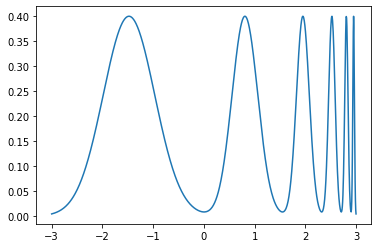

In [343]:
x = np.linspace(-3, 3, 10**3)
K = 6
plt.plot(x, peigne(x, K))

etc...

## Exercice 2 : Simulation de mixture gaussienne
Selon un article de N. Herpin, la taille moyenne des femmes en France en 2001 était de $1,619m$ avec un écart-type de $0,065m$ tandis que celle des hommes était de $1,741m$ avec 
un écart-type de $0,071m$. 
La population française était, à peu près à la même époque, constituée de $51,4\%$ de femmes et $48,6\%$ d'hommes. 
- En supposant que la distribution des tailles des femmes (resp. des hommes) soit gaussienne, modéliser la taille d'un individu quelconque de la population par une loi de probabilité.
- Ecrire une fonction *echantillon* permettant de simuler $n$ réalisations d'une telle loi.
- Représenter le résultat de la simulation pour un $n$ de l'ordre de la centaine puis $500$ sous la forme d'un histogramme. Est-ce que cet histogramme **ressemble** à ce qu'on pourrait obtenir à partir d'une loi normale ? 
- Tracer sur le même graphe les deux gaussiennes du mélange ainsi que la densité ci-dessus. 

In [450]:
def population(K,mu,sigma,alpha,x):
    densite = np.zeros(x.shape[0])
    for k in range(K):
            densite += alpha[k]*stand(x, mu[k], sigma[k])
    return densite

In [451]:
def echantillon(K,mu,sigma,alpha,n):
    z = np.random.choice(range(K), p = alpha, size = n)
    E = []
    for i in range(n):
        Mu, Sigma = mu[z[i]], sigma[z[i]]
        E.append(Mu + Sigma*np.random.randn())
    return E

In [452]:
K = 2
mu = [1.619,1.741]
sigma = [.065,.071]
alpha = [.514,.486]
n = 5*10**2
x = np.linspace(1.3, 2.1, 10**3)

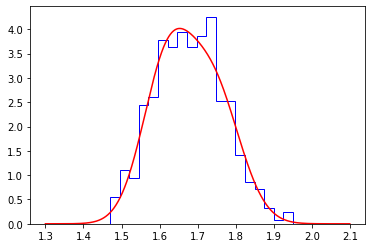

In [454]:
P = population(K,mu,sigma,alpha,x)
E = echantillon(K,mu,sigma,alpha,n)

plt.hist(E, bins = round(3*n**(.3)), density = 1, histtype = "step", color="b")
plt.plot(x, P,"r")